In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv('C:\\Users\\vlad-\Desktop\StudentsPerformance.csv')
print(df.isnull().any().sum())
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.shape[0])
df.head(3)

0
0
1000


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


В датасете 1000 строк и 8 колонок. Пропусков и дубликатов нет 

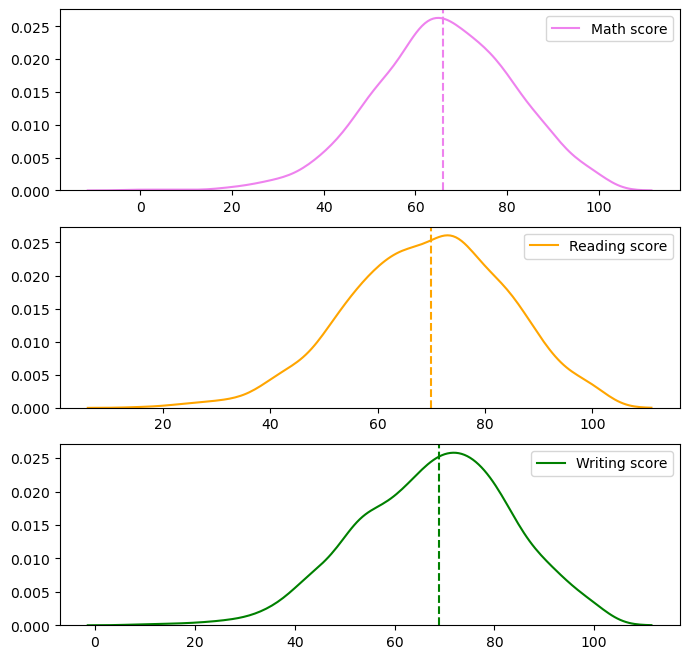

In [51]:
data_m = df['math score']
data_r = df['reading score']
data_w = df['writing score']


fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# График для Math score
sns.kdeplot(data_m, ax=axs[0], label='Math score', color='violet')
axs[0].axvline(data_m.median(), color='violet', linestyle='--')
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].legend()

# График для Reading score
sns.kdeplot(data_r, ax=axs[1], label='Reading score', color='orange')
axs[1].axvline(data_r.median(), color='orange', linestyle='--')
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].legend()

# График для Writing score
sns.kdeplot(data_w, ax=axs[2], label='Writing score', color='green')
axs[2].axvline(data_w.median(), color='green', linestyle='--')
axs[2].set_xlabel('')
axs[2].set_ylabel('')
axs[2].legend()

plt.show()


Медианные значения набранных по экзаменам результатов очень близки, распределения очень похожи. Меньшая медиана у экзамена по математике

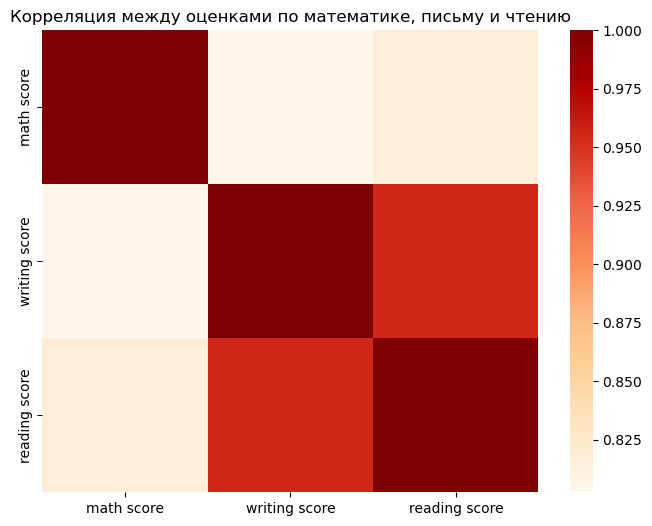

,math score,writing score,reading score
math score,1.000000,0.802642,0.817580
writing score,0.802642,1.000000,0.954598
reading score,0.817580,0.954598,1.000000


In [52]:
df_scores = df[['math score', 'writing score', 'reading score']]
correlation = df_scores.corr()

# Создайте тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=False, cmap='OrRd')
plt.title('Корреляция между оценками по математике, письму и чтению')
plt.show()
correlation

Корреляция результатов высокая, но математика коррелирует с другими экзаменами слабее

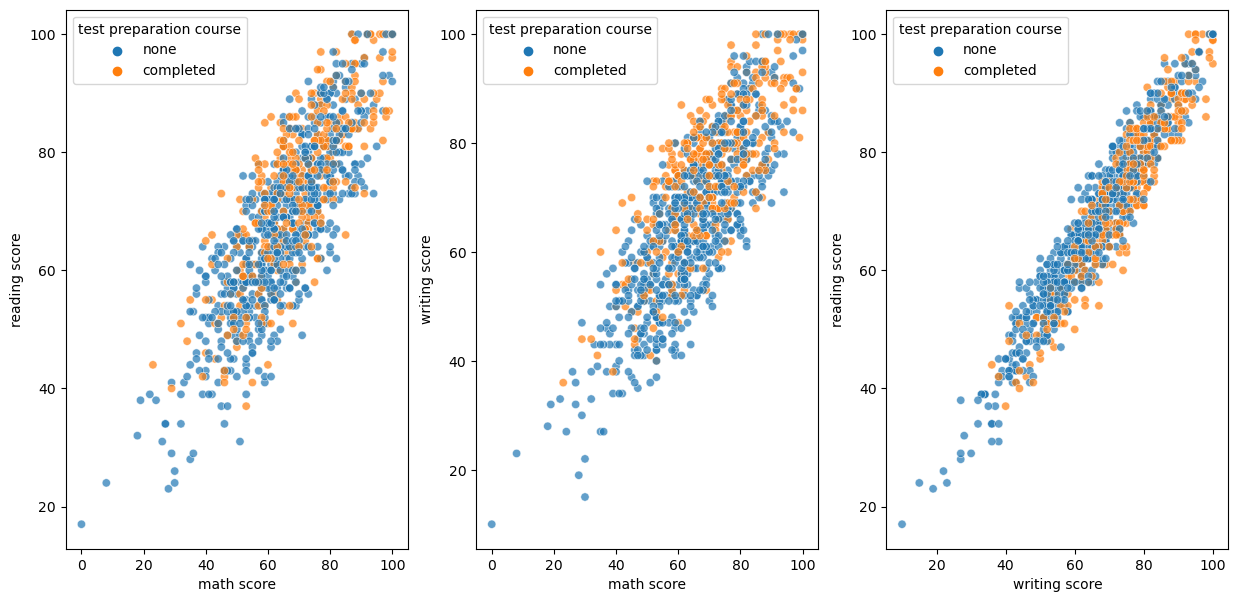

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(15, 7))

sns.scatterplot(data=df, x='math score', y='reading score', hue='test preparation course', alpha=0.7, ax=ax[0])
sns.scatterplot(data=df, x='math score', y='writing score', hue='test preparation course', alpha=0.7, ax=ax[1])
sns.scatterplot(data=df, x='writing score', y='reading score', hue='test preparation course', alpha=0.7, ax=ax[2])

plt.show()

Диаграммы рассеяния наглядно показывают высокую корреляцию экзамена по чтению и письму. Также видно, что разброс на графиках с результатами по математике выше, то есть и корреляция слабее. Также можно отметить, что в целом при подготовке к экзаменам в среднем студенты сдают их лучше 

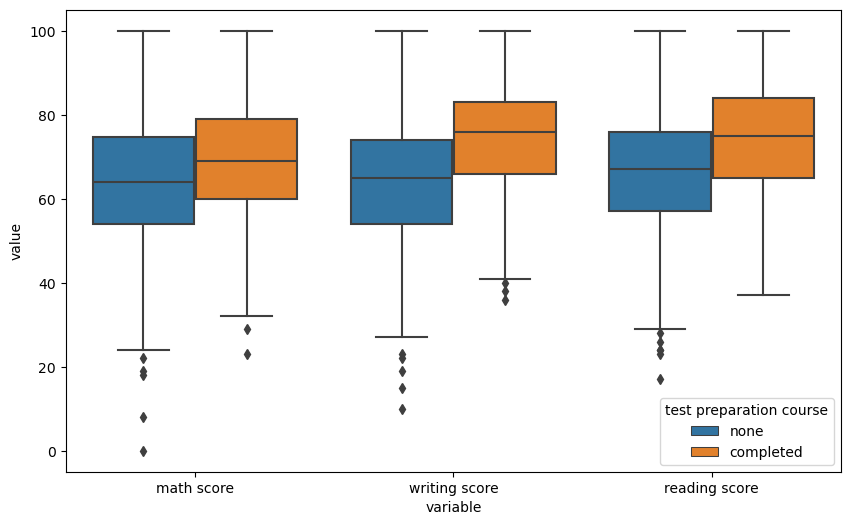

In [54]:
melted_df = pd.melt(df, id_vars='test preparation course', value_vars=['math score', 'writing score', 'reading score'])

# Создание графика
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='variable', y='value', hue='test preparation course')
plt.show()

Ящики с усами также подверждают, что в среднем подготовка чуть повышает шансы лучше сдать экзамен